In [3]:
import numpy as np
from numpy import pi

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # ? I see why isn't we always use this


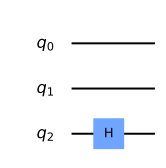

In [4]:
qc = QuantumCircuit(3)

qc.h(2)
qc.draw('mpl')

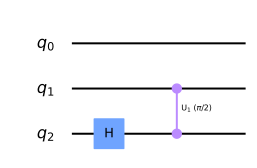

In [5]:
qc.cu1(pi/2, 1, 2)
qc.draw('mpl')

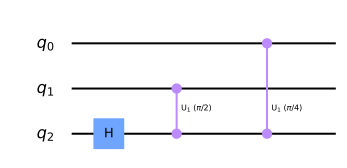

In [6]:
qc.cu1(pi/4, 0, 2)
qc.draw('mpl')

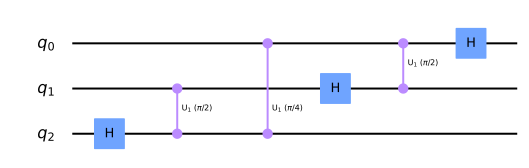

In [7]:
qc.h(1)
qc.cu1(pi/2, 0,1)
qc.h(0)
qc.draw('mpl')

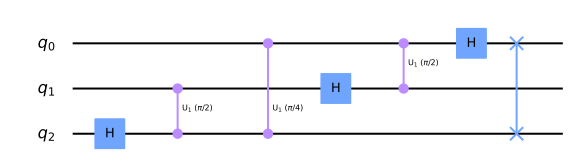

In [8]:
qc.swap(0,2)
qc.draw('mpl')

In [13]:
def qft_rotations_v1(circuit, n):
    if n <= 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    

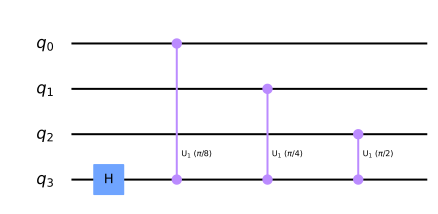

In [14]:
qc = QuantumCircuit(4)
qft_rotations_v1(qc, 4)
qc.draw('mpl')

In [17]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)


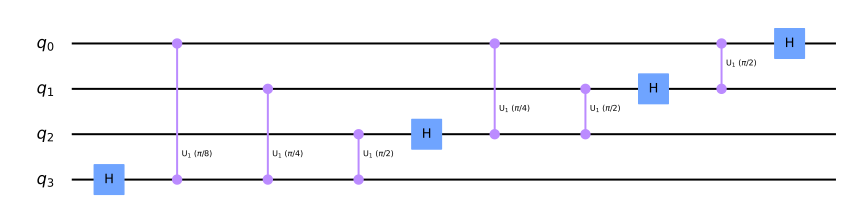

In [18]:
qc = QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw('mpl')

In [19]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


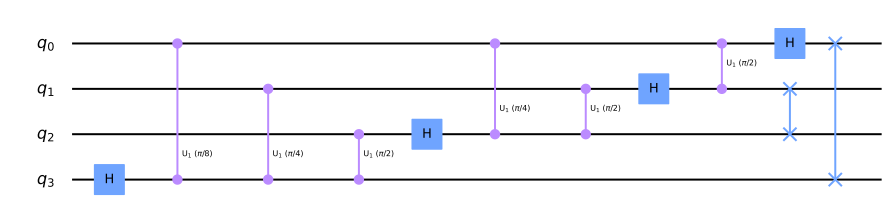

In [20]:
qc = QuantumCircuit(4)
qft(qc, 4)
qc.draw('mpl')

In [21]:
bin(5)

'0b101'

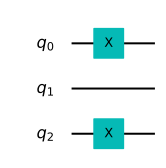

In [22]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
%config InlineBackend.figure_format = 'svg' # ? why again
qc.draw('mpl')

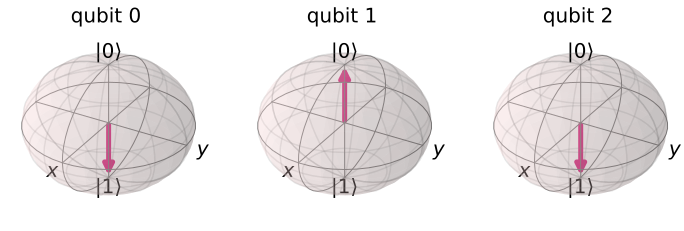

In [23]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend = backend).result().get_statevector()
plot_bloch_multivector(statevector)

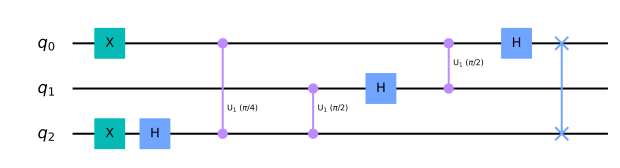

In [24]:
qft(qc, 3)
qc.draw('mpl')

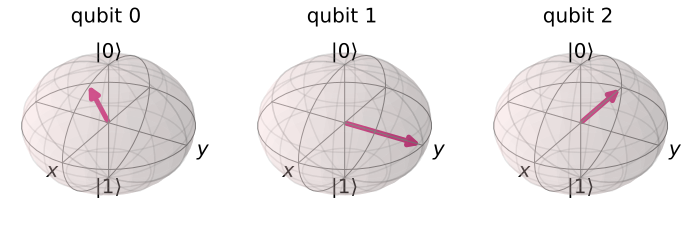

In [25]:
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [26]:
def inverse_qft(circuit, n):
    qft_circ = qft(QuantumCircuit(n), n)
    
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose()


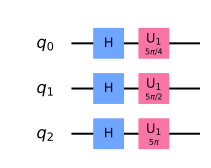

In [27]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.u1(number*pi/4,0)
qc.u1(number*pi/2,1)
qc.u1(number*pi,2)
qc.draw('mpl')

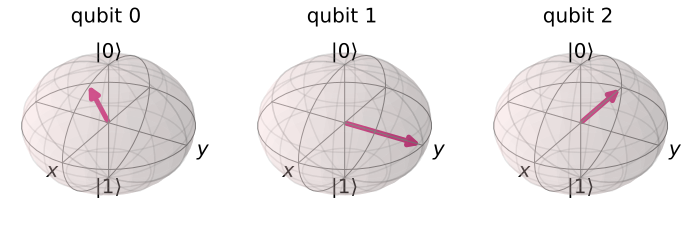

In [28]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend = backend).result().get_statevector()
plot_bloch_multivector(statevector)

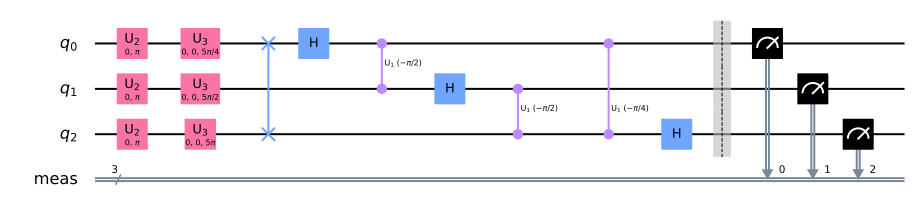

In [29]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

In [31]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                      and not x.configuration().simulator
                                      and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-04 22:05:54,626: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_valencia


In [32]:
shots = 2048
job = execute(qc, backend = backend, shots = shots, optimization_level = 3)
job_monitor(job)

Job Status: job has successfully run


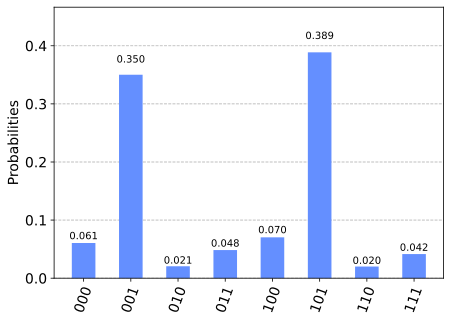

In [33]:
counts = job.result().get_counts()
plot_histogram(counts)

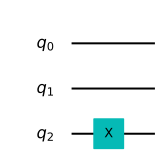

In [34]:
# oof problems :(
qc = QuantumCircuit(3)

# Encode the state 4
qc.x(2)
%config InlineBackend.figure_format = 'svg' # Makes the images fit
qc.draw('mpl')

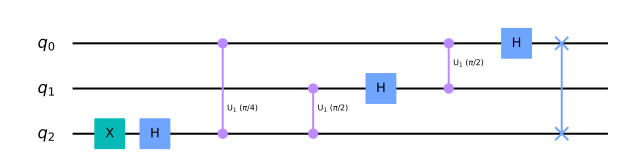

In [35]:
qft(qc,3)
qc.draw('mpl')

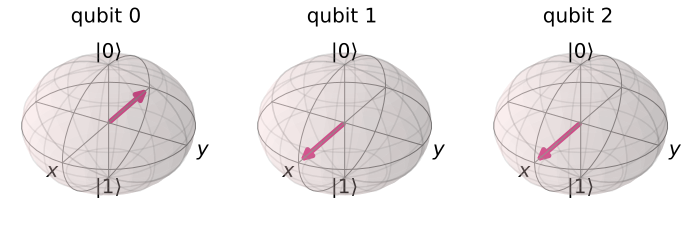

In [37]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

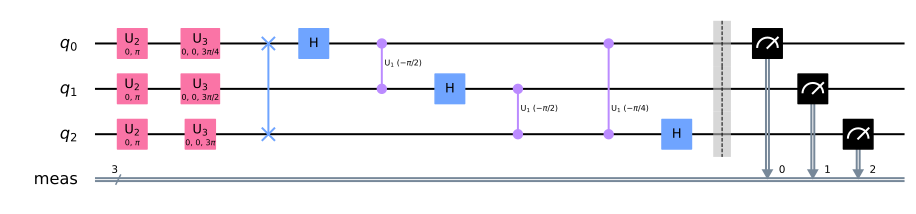

In [50]:
nqubits = 3
number = 3
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.u1(number*pi/4,0)
qc.u1(number*pi/2,1)
qc.u1(number*pi,2)
qc = inverse_qft(qc, nqubits)
qc.measure_all()

qc.draw('mpl')

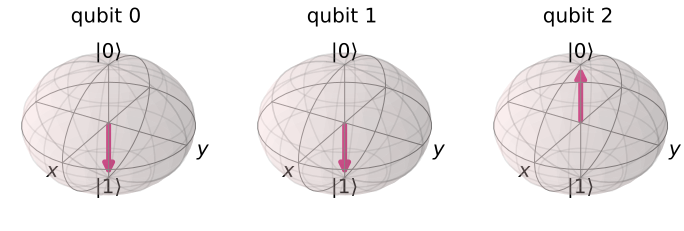

In [51]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [52]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)


/home/note/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-04 22:20:51,723: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_valencia


In [53]:
shots = 2048
job = execute(qc, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)

Job Status: job has successfully run


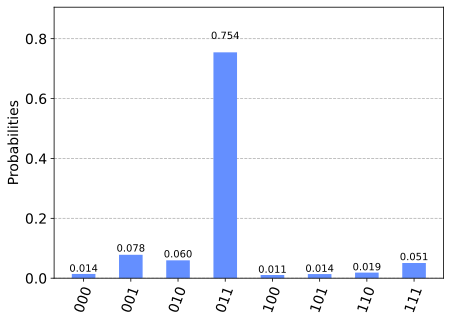

In [64]:
counts = job.result().get_counts()
plot_histogram(counts)
# ok got 3 as needed

In [56]:
# qft without recursion
def qft_rotations_new(circuit, n):
    if n == 0:
        return circuit
    while (n > 0):
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cu1(pi/2**(n-qubit), qubit, n)
    

In [62]:
def qft_new(circuit, n):
    qft_rotations_new(circuit, n)
    swap_registers(circuit, n)
    return circuit

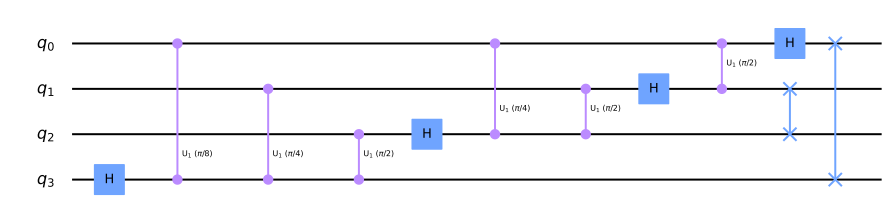

In [63]:
qc = qft_new(QuantumCircuit(4),4)
qc.draw('mpl')
# looks ok